# 👩🏻‍💻 Telecom X - Análisis de Evasión de Clientes

## Acerca del desafío

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## ⚙️ Configuración inicial

### Librerias
Este apartado es para importar todas las librerias que se necesitan en el proyecto.

In [211]:
# Librerias que se utilizarán en el proyecto.
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##📌 Extracción

### Cargue de los datos
Se carga la información en el notebook para su posterior procesamiento.

In [212]:
# Ubicación de los datos que se van a tratar, en formato json.
datos = '/content/TelecomX_Data.json'

In [213]:
# Dataframe creado con la información del json que contiene los datos de interes.
df_clientes = pd.read_json(datos)

##🔧 Transformación

### Exploración
En este apartado se revisan los datos a detalle para entender su estructura.

In [214]:
# Información básica de la forma del dataframe.
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [215]:
# Visualización de los datos. Resulta que los datos no están normalizados.
df_clientes.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [216]:
# Lista con los nombres de las columnas del dataframe. Se usara para revisión.
columnas = list(df_clientes.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [217]:
# Con la lista de nombre de columnas, imprimimos el contenido del primer registro.
# Son en total 21 columnas (campos) a considerar. Hay 2 niveles para normalizar.
for columna in columnas[2:]:
  print(df_clientes.loc[0,columna])

{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'No'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


#### Normalización

Teniendo en cuenta que los datos no están normalizados para su análisis, primero se realiza un aplanamiento (normalización), para entenderlos correctamente.

In [218]:
# Para normalizar todo el conjunto de datos, lo realizamos directamente del json.
with open(datos, "r") as f:
    data = json.load(f)
df_clientes = pd.json_normalize(data)
df_clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [219]:
# Listado con los nombre de las columnas. Se usará para acortar los nombres.
columnas = list(df_clientes.columns)
columnas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [220]:
# Por facilidad se copia y pega la lista anterior, modificando lo que se quiere.
# Charges. se mantiene para diferenciar que hay uno anual y otro mensual.
columnas = \
 ['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']
df_clientes.columns = columnas
df_clientes.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [221]:
# Revisión de algunos registros de manera aleatoria.
df_clientes.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2698,3739-YBWAB,No,Male,0,Yes,No,36,No,No phone service,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,35.35,1317.95
6084,8314-DPQHL,No,Male,0,No,No,9,No,No phone service,DSL,...,No,Yes,Yes,No,Yes,One year,No,Mailed check,50.80,463.6
1627,2311-QYMUQ,Yes,Female,0,Yes,Yes,16,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.45,1430.25


In [222]:
df_clientes.iloc[1604,:]

,1604
customerID,2274-XUATA
Churn,No
gender,Male
SeniorCitizen,1
Partner,Yes
Dependents,No
tenure,72
PhoneService,No
MultipleLines,No phone service
InternetService,DSL


#### Comprobación de incoherencias y estandarización de los datos

Comprobación de incoherencias en los datos, manejo de inconsistencias y estandarización de los datos.

In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
# Revision de alcunas columnas/campos, para determinar si hay que hacer alguna limpieza por errores de escritura.
ignorar =  ['customerID', 'Charges.Monthly', 'Charges.Total']
for columna in columnas:
  if columna not in ignorar:
    print(columna,"-"*15)
    print(df_clientes[columna].unique())
    print()

Churn ---------------
['No' 'Yes' '']

gender ---------------
['Female' 'Male']

SeniorCitizen ---------------
[0 1]

Partner ---------------
['Yes' 'No']

Dependents ---------------
['Yes' 'No']

tenure ---------------
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService ---------------
['Yes' 'No']

MultipleLines ---------------
['No' 'Yes' 'No phone service']

InternetService ---------------
['DSL' 'Fiber optic' 'No']

OnlineSecurity ---------------
['No' 'Yes' 'No internet service']

OnlineBackup ---------------
['Yes' 'No' 'No internet service']

DeviceProtection ---------------
['No' 'Yes' 'No internet service']

TechSupport ---------------
['Yes' 'No' 'No internet service']

StreamingTV ---------------
['Yes' 'No' 'No internet service']

StreamingMovies ---------------
['No' 'Yes' 'No internet ser

In [225]:
# No tiene mucho caso tener categorias como 'No internet service' o 'No phone service', cuando esta infomración ya se tiene en campos específicos.
# La limpieza inicial cambiará esos valores por 'No' (estandarización)

df_clientes['MultipleLines'] = df_clientes['MultipleLines'].replace('No phone service', 'No')
df_clientes['OnlineSecurity'] = df_clientes['OnlineSecurity'].replace('No internet service', 'No')
df_clientes['OnlineBackup'] = df_clientes['OnlineBackup'].replace('No internet service', 'No')
df_clientes['DeviceProtection'] = df_clientes['DeviceProtection'].replace('No internet service', 'No')
df_clientes['TechSupport'] = df_clientes['TechSupport'].replace('No internet service', 'No')
df_clientes['StreamingTV'] = df_clientes['StreamingTV'].replace('No internet service', 'No')
df_clientes['StreamingMovies'] = df_clientes['StreamingMovies'].replace('No internet service', 'No')


In [226]:
# Nueva revisión para validar los cambios.
ignorar =  ['customerID', 'Charges.Monthly', 'Charges.Total']
for columna in columnas:
  if columna not in ignorar:
    print(columna,"-"*15)
    print(df_clientes[columna].unique())
    print()

Churn ---------------
['No' 'Yes' '']

gender ---------------
['Female' 'Male']

SeniorCitizen ---------------
[0 1]

Partner ---------------
['Yes' 'No']

Dependents ---------------
['Yes' 'No']

tenure ---------------
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService ---------------
['Yes' 'No']

MultipleLines ---------------
['No' 'Yes']

InternetService ---------------
['DSL' 'Fiber optic' 'No']

OnlineSecurity ---------------
['No' 'Yes']

OnlineBackup ---------------
['Yes' 'No']

DeviceProtection ---------------
['No' 'Yes']

TechSupport ---------------
['Yes' 'No']

StreamingTV ---------------
['Yes' 'No']

StreamingMovies ---------------
['No' 'Yes']

Contract ---------------
['One year' 'Month-to-month' 'Two year']

PaperlessBilling ---------------
['Yes' 'No']

PaymentMethod ---------------

In [227]:
# Revisión del campo 'Churn', por datos vacios
df_clientes['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


Considerando que el campo `Churn` tiene información faltante y que esta no tiene manera de comprobarse para saber si corresponde a 'Si' o 'No', se filtrará del dataframe. Teniendo en consideración que representan cerca del 3% de los registros del conjunto de datos, no habría mucho inconveniente con quitarlos del análisis.

In [228]:
# Retiro de los registros 'Churn' sin información útil
df_clientes = df_clientes.query('Churn != ""')
df_clientes.shape

(7043, 21)

Ahora se estandarizarán los campos para que los campos binarios sean de 1 o 0 en lugar de 'Si' o 'No

In [229]:
columnas_objetivo = ['Churn', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'PaperlessBilling']
df_clientes[columnas_objetivo] = (df_clientes[columnas_objetivo]
                                  .replace({'Yes': 1, 'No': 0})).astype(int)

/tmp/ipython-input-229-2028728633.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Yes': 1, 'No': 0})).astype(int)


In [230]:
# Se revisa que los cambios se aplicaran correctamente
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

Hay que corregir los valores en el campo `Charges.Total` que hacen que la columna se interprete como de tipo Object

In [231]:
columna_convertida = pd.to_numeric(df_clientes['Charges.Total'], errors='coerce')
registros_invalidos = df_clientes[~df_clientes['Charges.Total'].isna() & columna_convertida.isna()]
registros_invalidos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,
1775,2520-SGTTA,0,Female,0,1,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.00,
1955,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,
2075,2923-ARZLG,0,Male,0,1,1,0,1,0,No,...,0,0,0,0,0,One year,1,Mailed check,19.70,
2232,3115-CZMZD,0,Male,0,0,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.25,
2308,3213-VVOLG,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.35,
2930,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,1,0,Two year,0,Mailed check,73.35,
3134,4367-NUYAO,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.75,
3203,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,1,0,1,1,Two year,0,Mailed check,80.85,


Con el código de arriba se entiende por que hay valores que no se interpretan como númericos en la columna `Charges.Total`. Posiblemente son clientes nuevos, por lo que se completará la información faltante con 0

In [232]:
df_clientes['Charges.Total'] = pd.to_numeric(df_clientes['Charges.Total'], errors='coerce')
df_clientes['Charges.Total'].fillna(0)
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

Revisamos si hay registros duplicados

In [233]:
# Duplicados por ID
df_clientes['customerID'].duplicated().sum()

np.int64(0)

#### Cuentas diarias

Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [234]:
# daily_charges: nueva variable.
df_clientes['daily_charges'] = round(df_clientes['Charges.Monthly']/30, 2)

In [235]:
df_clientes.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily_charges
2433,3398-GCPMU,0,Female,1,1,1,72,1,1,DSL,...,1,1,1,1,Two year,1,Credit card (automatic),89.55,6448.85,2.98
2739,3793-MMFUH,1,Female,1,0,0,13,1,1,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,95.05,1290.00,3.17
6926,9541-ZPSEA,0,Male,0,1,1,68,1,0,Fiber optic,...,1,0,0,0,Two year,0,Credit card (automatic),80.35,5375.15,2.68
5795,7925-PNRGI,0,Female,0,1,1,45,1,1,DSL,...,1,1,1,0,Month-to-month,0,Mailed check,81.30,3541.10,2.71
6339,8722-NGNBH,1,Male,0,0,0,5,0,0,DSL,...,1,1,0,0,Month-to-month,0,Mailed check,40.00,223.45,1.33


##📊 Carga y análisis

### Análisis de las variables

#### Meidadas de tendencia central (.describe)

In [236]:
df_clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.000,1.0000,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.000,1.0000,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.000,1.0000,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.000,1.0000,1.00


La mayor parte de los clientes se mantienen activos (73.5% aprox.), es decir que aun no cancelan sus servicios con la empresa. Esto lo vemos en la media de la varible `Churn`, que por la forma en la que está construida indica la cantidad de personas activa con su servicio. Por otra parte, se tiene que cerca del 16.2% de los clientes son de la tercera edad; que hay una rango amplio en el cargo por afiliación mensual (rango entre el máx. y mín. de `Charges.Monthly`), que se puede deber a las diferentes ofertas disponibles; y que el servicio más utilizado es el de telefonía (`PhoneService`), teniendo una cantidad de usuarios mucho mayor a la de los otros sevicios.

In [237]:
churn_cargomen = df_clientes.groupby('Churn')['Charges.Monthly'].mean().reset_index()
churn_cargomen

,Churn,Charges.Monthly
0,0,61.265124
1,1,74.441332


Revisando la relación entre el costo mensual de servicio y la cantidad de clientes inactivos, se encuentra que para los clientes inactivos el costo mensual fue más alto, en comparación con los clientes activos.

### Análisis gráfico

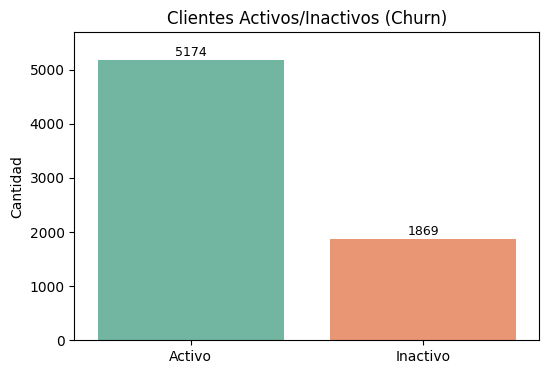

In [238]:
# Distribución de cancelación de clientes

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes, x='Churn', hue='Churn', legend=False, palette='Set2')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos (Churn)')
plt.xlabel('')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

# Mostrar la gráfica
plt.show()


In [239]:
# Distribución de cancelación de clientes. Por genero

churn_per_gender = df_clientes.groupby(['Churn', 'gender'])['gender'].count().unstack()
churn_per_gender

gender,Female,Male
Churn,,
0,2549,2625
1,939,930


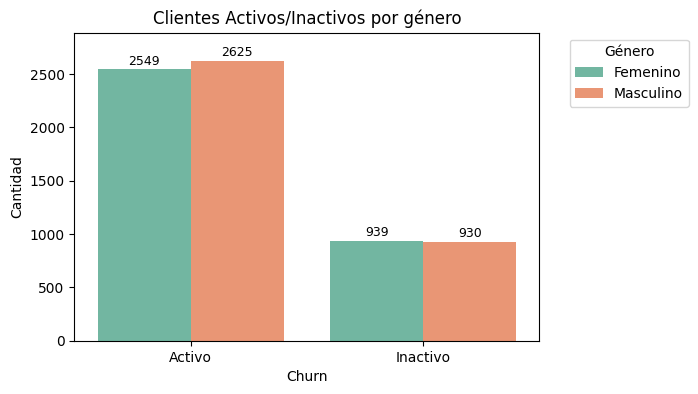

In [295]:
# Distribución de cancelación de clientes por género

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes, x='Churn', hue='gender', legend=True, palette='Set2')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos por género')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
    'Female': 'Femenino',
    'Male': 'Masculino'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/fidelizacion_por_genero.png',
            transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

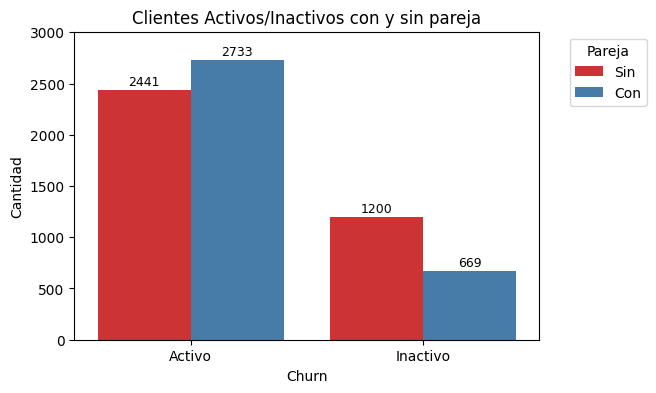

In [296]:
# Distribución de cancelación de clientes con y sin pareja

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes, x='Churn', hue='Partner', legend=True, palette='Set1')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos con y sin pareja')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
    '0': 'Sin',
    '1': 'Con'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Pareja', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/fidelizacion_parejas.png',
            transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

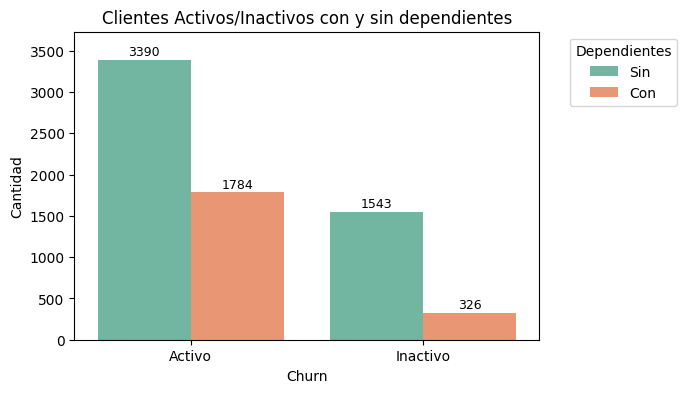

In [297]:
# Distribución de cancelación de clientes con y sin dependientes

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes, x='Churn', hue='Dependents', legend=True, palette='Set2')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos con y sin dependientes')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
    '0': 'Sin',
    '1': 'Con'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Dependientes', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/fidelizacion_dependientes.png',
            transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

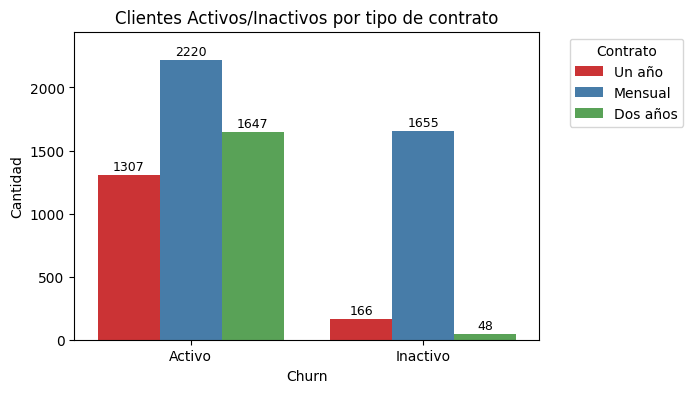

In [298]:
# Distribución de cancelación de clientes por tipo de contrato

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes, x='Churn', hue='Contract', legend=True, palette='Set1')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos por tipo de contrato')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
   'One year': 'Un año',
   'Two year': 'Dos años',
   'Month-to-month':'Mensual'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Contrato', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/fidelizacion_contrato.png',
            transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [244]:
churn_cargomen = df_clientes[df_clientes['Contract']=='Month-to-month'].groupby('Churn')['Charges.Monthly'].mean().reset_index()
churn_cargomen

,Churn,Charges.Monthly
0,0,61.462635
1,1,73.019396


Para los clientes con contratos mensuales, el costo mensual promedio fue más alto para los que se retiraron (inactivos), en comparación con los clientes activos.

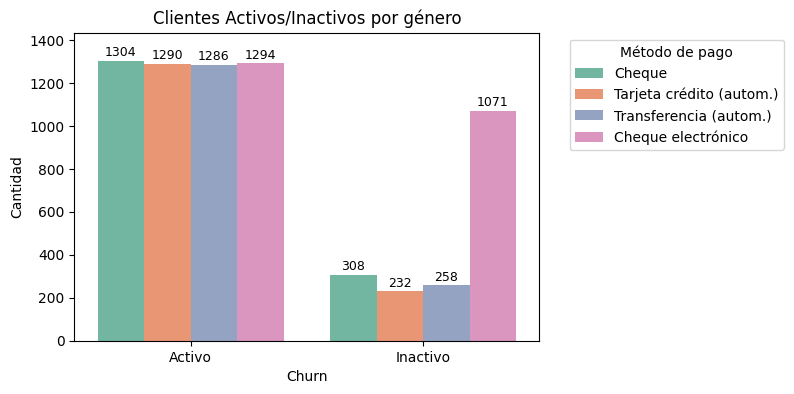

In [299]:
# Distribución de cancelación de clientes por tipo de medio de pago

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_clientes,
                   x='Churn', hue='PaymentMethod', legend=True,
                   palette='Set2')
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos por género')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
    'Mailed check': 'Cheque',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)':'Tarjeta crédito (autom.)',
    'Bank transfer (automatic)':'Transferencia (autom.)'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Método de pago', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/fidelizacion_medio_pago.png',
            transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [246]:
# Revisión de clientes inactivos por metodo de pago y contrato
churn_paymet_contr = df_clientes.groupby(['Churn', 'Contract', 'PaymentMethod'])['Contract'].count()
churn_paymet_contr

Churn  Contract        PaymentMethod            
0      Month-to-month  Bank transfer (automatic)    388
                       Credit card (automatic)      365
                       Electronic check             856
                       Mailed check                 611
       One year        Bank transfer (automatic)    353
                       Credit card (automatic)      357
                       Electronic check             283
                       Mailed check                 314
       Two year        Bank transfer (automatic)    545
                       Credit card (automatic)      568
                       Electronic check             155
                       Mailed check                 379
1      Month-to-month  Bank transfer (automatic)    201
                       Credit card (automatic)      178
                       Electronic check             994
                       Mailed check                 282
       One year        Bank transfer (automatic)     38
                       Credit card (automatic)       41
                       Electronic check              64
                       Mailed check                  23
       Two year        Bank transfer (automatic)     19
                       Credit card (automatic)       13
                       Electronic check              13
                       Mailed check                   3
Name: Contract, dtype: int64

In [247]:
temp = churn_paymet_contr.unstack().reset_index()
temp.columns.name = None
temp.query('Churn==1', inplace=True)
temp.drop(columns=['Churn'], inplace=True)
temp.reset_index(drop=True, inplace=True)
temp

,Contract,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,Month-to-month,201,178,994,282
1,One year,38,41,64,23
2,Two year,19,13,13,3


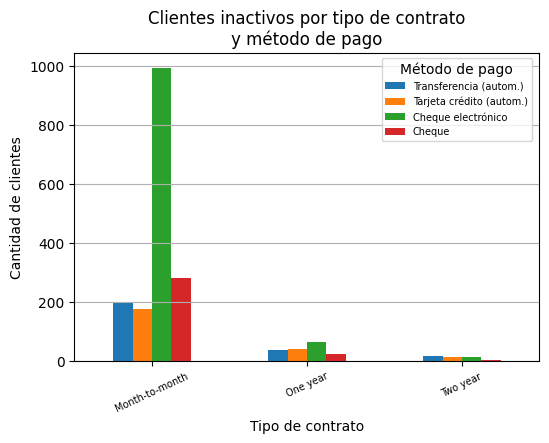

In [248]:
ax = temp.plot(kind='bar', figsize=(6, 4))
plt.title('Clientes inactivos por tipo de contrato\ny método de pago')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.xticks(rotation=25, fontsize=7)
plt.xticks([0, 1, 2], temp['Contract'].to_list())
mapa_leyenda = {
    'Mailed check': 'Cheque',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)':'Tarjeta crédito (autom.)',
    'Bank transfer (automatic)':'Transferencia (autom.)'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]  # deja igual si no está en el diccionario
ax.legend(handles, labels_traducidas, title='Método de pago',
          bbox_to_anchor=(0.65, 1), loc='upper left', fontsize=7)
plt.grid(axis='y')

plt.show()

Como ya se vió, la mayor parte de los clientes que cancelan sus servicios, tuvieron contratos por mes y adicionalmente el metodo de pago preferido fue el de cheques electrónicos.

In [305]:
df_clientes.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'daily_charges', 'num_services'],
      dtype='object')

In [249]:
columnas_a_sumar = [
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

# Calcular la suma por fila
df_clientes['num_services'] = (df_clientes[columnas_a_sumar].sum(axis=1) +
                                 df_clientes['InternetService'].apply(lambda x: 0 if x == 'No' else 1))
df_clientes.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily_charges,num_services
3905,5338-YHWYT,0,Male,0,0,1,37,1,0,DSL,...,1,0,0,Two year,0,Credit card (automatic),61.45,2302.35,2.05,5
2637,3675-EQOZA,0,Male,0,0,0,5,1,0,No,...,0,0,0,Month-to-month,0,Bank transfer (automatic),20.65,93.55,0.69,1
4007,5480-XTFFL,0,Female,0,1,1,31,1,0,No,...,0,0,0,Two year,0,Mailed check,21.00,697.70,0.70,1


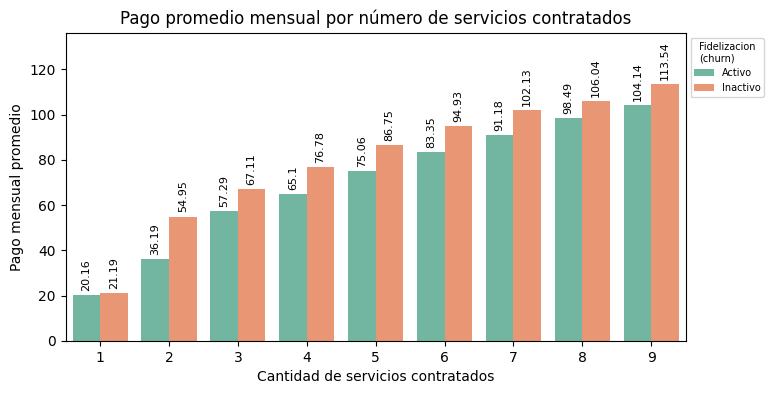

In [276]:
# Comparación de pago mensual promedio por cantidad de servicios contratados

costo_medio_servicios = df_clientes.groupby(['Churn','num_services'])['Charges.Monthly'].mean().reset_index()
costo_medio_servicios['Charges.Monthly'] = round(costo_medio_servicios['Charges.Monthly'], 2)
# costo_medio_servicios
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=costo_medio_servicios,
                 x='num_services', y='Charges.Monthly',
                 hue='Churn', legend=True, palette='Set2')
ax.set_title('Pago promedio mensual por número de servicios contratados')
ax.set_xlabel('Cantidad de servicios contratados')
ax.set_ylabel('Pago mensual promedio')

mapa_leyenda = {
    '0': 'Activo',
    '1': 'Inactivo'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]
ax.legend(handles, labels_traducidas, title='Fidelizacion\n(churn)',
          bbox_to_anchor=(1, 1), loc='upper left',
          title_fontsize=7, fontsize=7)
max_altura = costo_medio_servicios['Charges.Monthly'].max()
ax.set_ylim(0, max_altura*1.2)

for container in ax.containers:
  ax.bar_label(container, label_type='edge', padding=3, rotation=90, fontsize=8)

plt.show()

##📄Informe final

### 🔹 Introducción

Como se indicó al principio de este proyecto, este desafio es para estudiar el "Churn de Clientes" de la compañia Telecom X. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

En el proyecto se recopilan, procesan y analizar los datos suministrados en formato JSON, utilizando Python y sus principales bibliotecas para extraer información valiosa.

### 🔹 Limpieza y Tratamiento de Datos

Para este paso, inicialmente se revisa el conjunto de datos para comprender como están estructurados. Se hace un cargue inicial, para entender que variables (campos) conforman el conjunto de datos y cuantos registros hay. Se realiza una normalización de los datos, ya que no lo están inicialmente, y así proceder con el análisis correspondiente. Antes de completar esta fase, tambien es necesario estandarizar algnos campor, para no tener mal interpretación de la información. Se unifica la forma en la que están escritos los datos, por ejemplo, para las variables de contienen **Si** y **No**, se transforman estos datos en **1** y **0**. Se limpian hace tratamiento en los campos vacios y se asegura el no tener duplicidad.

###🔹 Análisis Exploratorio de Datos:

Como se muestra en la sección de <strong><font color="33bbff">Carga y Análisis</font></strong>, se encuentra que para los clientes que tienen contratos de tipo 'Mes a Mes' la probabilidad de cancelar los servicios es más alta.



<img src="https://raw.githubusercontent.com/Manuel-Mantilla/Challenge-Telecom-X/refs/heads/main/imagenes/fidelizacion_contrato.png" alt="img fidelizacion por contrato">

Tambien se encuentra que los clientes que pagan con 'Cheques electrónicos' tienen una mayor probabilidad de cancelar los servicios.

<img src="https://raw.githubusercontent.com/Manuel-Mantilla/Challenge-Telecom-X/refs/heads/main/imagenes/fidelizacion_medio_pago.png" alt="img fidelizacion por medio de pago">

Adicionalmente se encuentra que para los clientes sin dependientes, es mayor la cantidad de retitos en comparación a los que si los tienen.

<img src="https://raw.githubusercontent.com/Manuel-Mantilla/Challenge-Telecom-X/refs/heads/main/imagenes/fidelizacion_dependientes.png" alt="img fidelizacion por medio de pago">

En el diagrama de calor que se presenta a continuación, se pueden visualizar la correlación que hay entre las diferentes variables del conjunto de datos (como se indicó en la sección de <strong><font color="33bbff">Transformación</font></strong>, se realizaron algunas transformaciones para cambiar datos categórigos a numéricos)

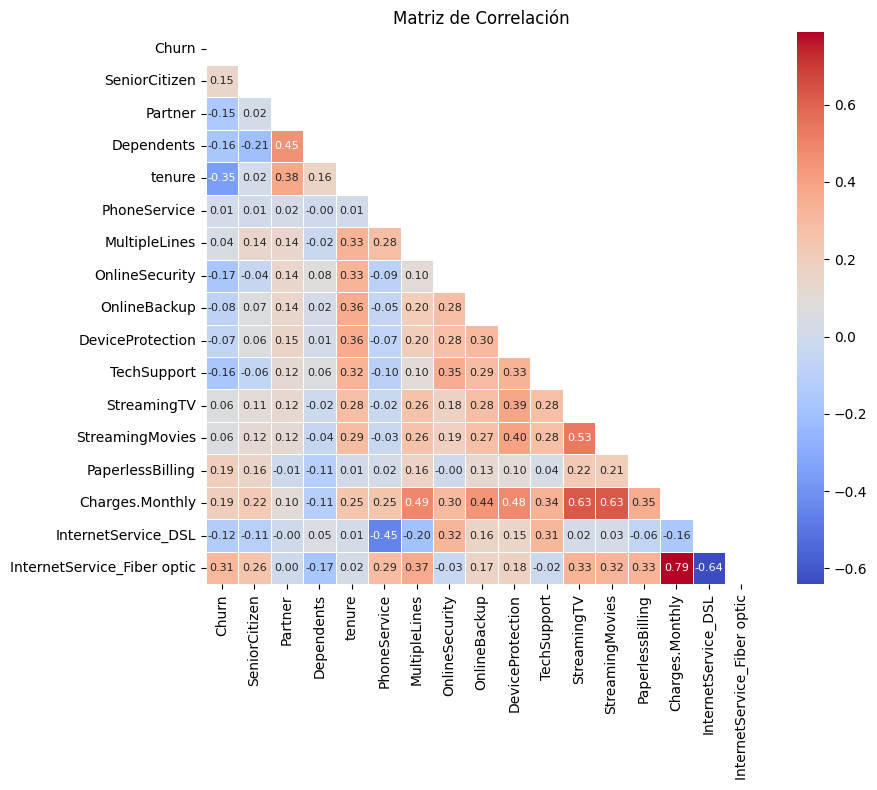

In [303]:
df_copia = df_clientes.copy()

df_numerico = df_copia.select_dtypes(include=['number'])

df_dummies = pd.get_dummies(df_copia['InternetService'],
                            prefix='InternetService').astype(int)
df_copia = pd.concat([df_numerico, df_dummies[['InternetService_DSL', 'InternetService_Fiber optic']]], axis=1)
df_copia.drop(columns=['Charges.Total', 'daily_charges', 'num_services'], inplace=True)

matriz_correlacion = df_copia.corr()

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(matriz_correlacion,
            mask=mask,
            annot=True,      # muestra los valores numéricos
            fmt=".2f",       # formato de los números
            cmap="coolwarm", # paleta de colores
            square=True,
            linewidths=0.5,
            annot_kws={"size": 8})
fig.savefig('/content/drive/MyDrive/ALURA/Proyecto2/Proyecto Telecom X/imagenes/correlacion.png',
            transparent=False, dpi=300, bbox_inches='tight')

plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

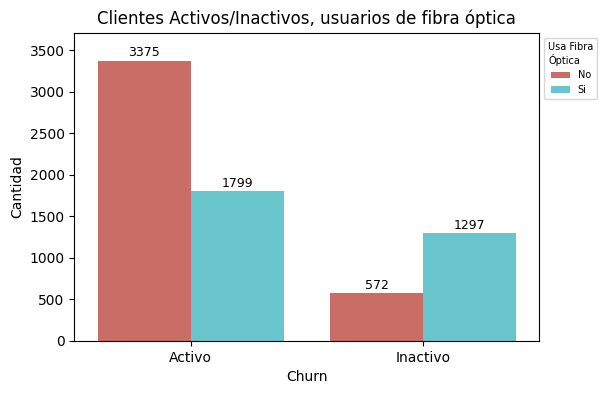

In [294]:
# Revisión de fidelización para los clientes con servicio de internet con fibra óptica

fig, _ = plt.subplots(figsize=(6, 4))
ax = sns.countplot(data=df_copia, x='Churn',
                   hue='InternetService_Fiber optic',
                   legend=True, palette=sns.color_palette("hls", 2))
plt.xticks([0, 1], ['Activo', 'Inactivo'])
plt.title('Clientes Activos/Inactivos, usuarios de fibra óptica')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
max_altura = max([p.get_height() for p in ax.patches])
ax.set_ylim(0, max_altura * 1.10)

mapa_leyenda = {
    '0': 'No',
    '1': 'Si'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]
ax.legend(handles, labels_traducidas,
          title='Usa Fibra\nÓptica', bbox_to_anchor=(1.0, 1), loc='upper left',
          title_fontsize=7, fontsize=7)

for container in ax.containers:
  ax.bar_label(container, label_type='edge', fontsize=9, padding=1)

# Mostrar la gráfica
plt.show()

In [309]:
# Tabla pivot para revisar varias variables

variables_columnas = ['PhoneService', 'MultipleLines',
                      'InternetService_Fiber optic', 'InternetService_DSL',
                      'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies']
tabla_resumen = df_copia.pivot_table(
    index='Churn',
    values=variables_columnas,
    aggfunc='sum'
)

tabla_resumen_graf = tabla_resumen.reset_index().melt(
    id_vars='Churn',
    var_name='Variable',
    value_name='Suma'
)

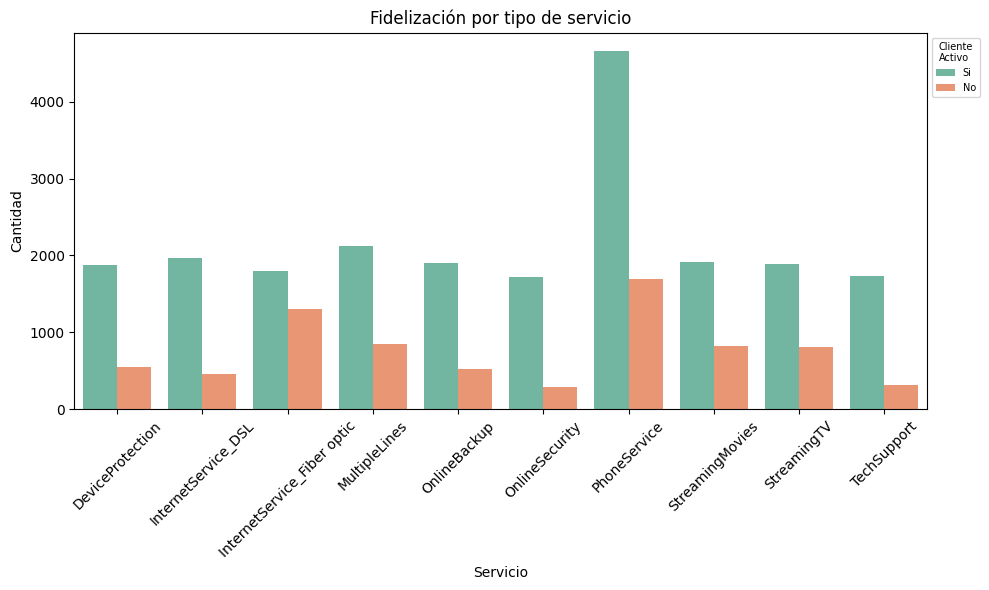

In [311]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=tabla_resumen_graf, x='Variable', y='Suma', hue='Churn', palette='Set2')

plt.title('Fidelización por tipo de servicio')
plt.ylabel('Cantidad')
plt.xlabel('Servicio')
plt.xticks(rotation=45)
mapa_leyenda = {
    '0': 'Si',
    '1': 'No'
}
handles, labels = ax.get_legend_handles_labels()
labels_traducidas = [mapa_leyenda.get(label, label) for label in labels]
ax.legend(handles, labels_traducidas,
          title='Cliente\nActivo', bbox_to_anchor=(1.0, 1), loc='upper left',
          title_fontsize=7, fontsize=7)

plt.tight_layout()
plt.show()

###🔹 Conclusiones e Insights

Como conclusión se tiene que hay ua relación entre los clientes que terminaron sus contratos y los montos que debían pagar mensualmente. Para los clientes inactivos se presenta un mayor promedio mensual de gasto por los servicios adquiridos, y que esto tiene una relación con el tipo de contrato pactado; los clientes con contratos de 'Mes a Mes' tienen mayor probabiliad de retirarse, independientemente de la cantidad de servicios.

Revisando la correlación, aunque no hay una relación directa entre las variables `Churn` y las demás del conjunto de datos, hay una fuerte relación entre las variables `Charges.Monthly`, `InternetService_Fiber optic`, `StreamingTV` y `StreamingMovies`; y teniendo en cuenta la alta probabilidad de retiro para los contratos 'Mes a Mes', se podrían diseñar capañas para mejorar este tipo de contratos en relación con estos servicios.

La mayor parte de los clientes tiene contratos por servicios de telefonía, tambien teniendo una alta cantidad de retiros en comparación a los que se tienen de otros servicios. Sin embargo, tambien tiene una alto número de clientes activos, por lo que sería importante revisar como se complementa con otros servicios, como con el de fibra óptica, que tiene una alta cantidad de retiros en relación con el total de clientes que han adquirido lo han adquirido.

###🔹 Recomendaciones:

- Ofrecer mejorer servicios en los contratos de 'Mes a Mes' para retener por más tiempo a los cliente.

- Mejorar las ofertas de servicios en fibra óptica y plataformas de streaming.

- Ofrecer descuentos o algún tipo de mejora en los servicios de los clientes con mayor tiempo de afilización, para mejorar el atractivo de los contratos a largo plazo.